In [1]:
The Sparks Foundation

Data Science and Business Analytics

Name - Chandranshu Jain

TASK 1 :Prediction using supervised ML

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
#importing data
data=pd.read_csv('C:/Users/chandranshu/Desktop/regression  grip task.csv')

In [4]:
#view data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


 Exploring the data

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

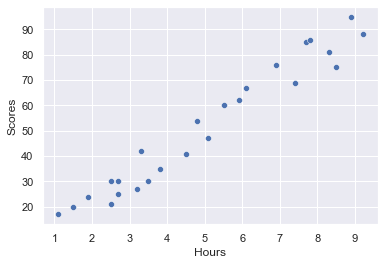

In [11]:
sns.scatterplot(y=data['Scores'],x=data['Hours'])

In [19]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Both the scatter plot and the correlation (0.976) suggest that there is presence of a strong positive linear relationship between hours and scores
Thus linear regression can be fitted

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

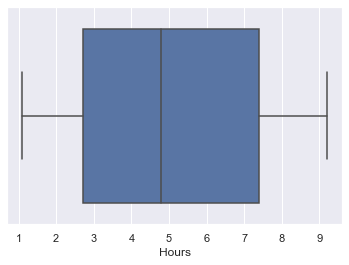

In [18]:
sns.boxplot(data['Hours'])

Thus we see that there are no outliers in the data

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

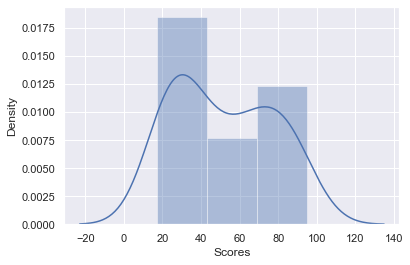

In [16]:
sns.distplot(data['Scores'])

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

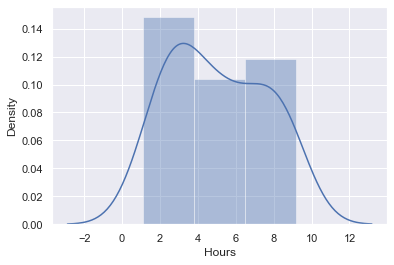

In [21]:
sns.distplot(data['Hours'])

Thus we can conclude that the data is approximately normal and linear regression can be fitted

In [120]:
#importing libraries to fit linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [121]:
y=np.array(data['Scores'])
x=np.array(data['Hours'])

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [131]:
x_train,y_train=x_train.reshape(-1,1),y_train.reshape(-1,1)
x_test,y_test=x_test.reshape(-1,1),y_test.reshape(-1,1)

In [132]:
lm=LinearRegression()
model=lm.fit(x_train,y_train)

In [133]:
model.coef_

array([[9.78385439]])

In [134]:
model.intercept_

array([2.69128676])

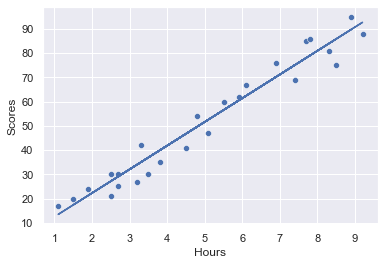

In [135]:
sns.scatterplot(x=data['Hours'],y=data['Scores'])
y_pred=2.69128676+(9.78385439*data['Hours'])
plt.plot(data['Hours'],y_pred)

In [136]:
model.score(x_train,y_train)

0.9487600938215679

So the predictive power of model based on train data is 0.94876

Prediction

In [154]:
y_pred=model.predict(x_test)

In [155]:
y_predd=y_pred.reshape(3,)
y_testt=y_test.reshape(3,)

In [159]:
pred_table=pd.DataFrame({'Actual':y_testt,'Predicted':y_predd})
pred_table

,Actual,Predicted
0,81,83.897278
1,30,27.150923
2,21,27.150923


In [170]:
value_to_predict=np.array([9.25])
value_to_predict=value_to_predict.reshape(-1,1)

In [171]:
print(f'The predicted score for{9.25} hrs is : {model.predict(value_to_predict)}')

The predicted score for9.25 hrs is : [[93.19193983]]


So after putting in 9.25 hrs, the predicted score is 93.191%

Model evaluation

In [178]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
mse=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mse is :',mse)
print('R^2 is :',r2)

Mse is : 3.9657593887812133
R^2 is : 0.974047128713709


So we see that as R^2 is close to 1 and the mse is pretty low , so we can say that the linear regression model is good one